In [30]:
import sympy as sp
import symengine as sm


In [31]:
x, y, z = sm.symbols('x y z', real=True, positive=True)
r, phi, theta = sm.symbols('r phi theta', real=True, positive=True)

In [32]:
r_cart = sm.sqrt(x**2+y**2+z**2)
theta_cart = sm.acos(z/r_cart)
phi_cart = sm.atan2(y,x)

In [33]:
g_ij_sph = sm.Matrix([[1/(1-1/r),0,0],[0,sm.Pow(r,2),0],[0,0,sm.Pow(r,2)*sm.sin(theta)**2]])
g_ij_sph

[(1 - r**(-1))**(-1), 0, 0]
[0, r**2, 0]
[0, 0, r**2*sin(theta)**2]

In [34]:
gij_sph = g_ij_sph.inv()
#gij_sph = g_ij_sph
gij_sph

[1 - r**(-1), 0, 0]
[0, r**(-2), 0]
[0, 0, 1/(r**2*sin(theta)**2)]

In [35]:
gij_sph = gij_sph.subs(r, r_cart)
gij_sph = gij_sph.subs(theta, theta_cart)
gij_sph.expand()

[1 - (x**2 + y**2 + z**2)**(-1/2), 0, 0]
[0, (x**2 + y**2 + z**2)**(-1), 0]
[0, 0, 1/((x**2 + y**2 + z**2)*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2)]

In [36]:
gij_sph_det = gij_sph.det()
gij_sph_det

(1 - (x**2 + y**2 + z**2)**(-1/2))/((x**2 + y**2 + z**2)**2*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2)

In [37]:
E = sm.sqrt(gij_sph_det) * gij_sph
E

[(1 - (x**2 + y**2 + z**2)**(-1/2))*sqrt((1 - (x**2 + y**2 + z**2)**(-1/2))/((x**2 + y**2 + z**2)**2*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2)), 0, 0]
[0, sqrt((1 - (x**2 + y**2 + z**2)**(-1/2))/((x**2 + y**2 + z**2)**2*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2))/(x**2 + y**2 + z**2), 0]
[0, 0, sqrt((1 - (x**2 + y**2 + z**2)**(-1/2))/((x**2 + y**2 + z**2)**2*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2))/((x**2 + y**2 + z**2)*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2)]

In [38]:
import numpy as np
from numpy import sqrt, sin
from numpy import arccos as acos

grid = np.linspace(-3,3,400)
xg, yg = np.meshgrid(grid, grid)
zg = 0
sg = 0.5

In [39]:
E_num = E.subs(x, sp.symbols('(xg)'))
E_num = E_num.subs(y, sp.symbols('(yg)'))
E_num = E_num.subs(z, sp.symbols('(zg)'))
#E_num = E_num.subs(s, sp.symbols('(sg)'))

In [40]:
E_comps = []

for i in range(3):
    for j in range(3):
        elem = eval(str(E_num[i,j]))
        if type(elem)==int:
                  elem = np.zeros((400,400))
        E_comps.append(elem)

<string>:1: RuntimeWarning: invalid value encountered in sqrt


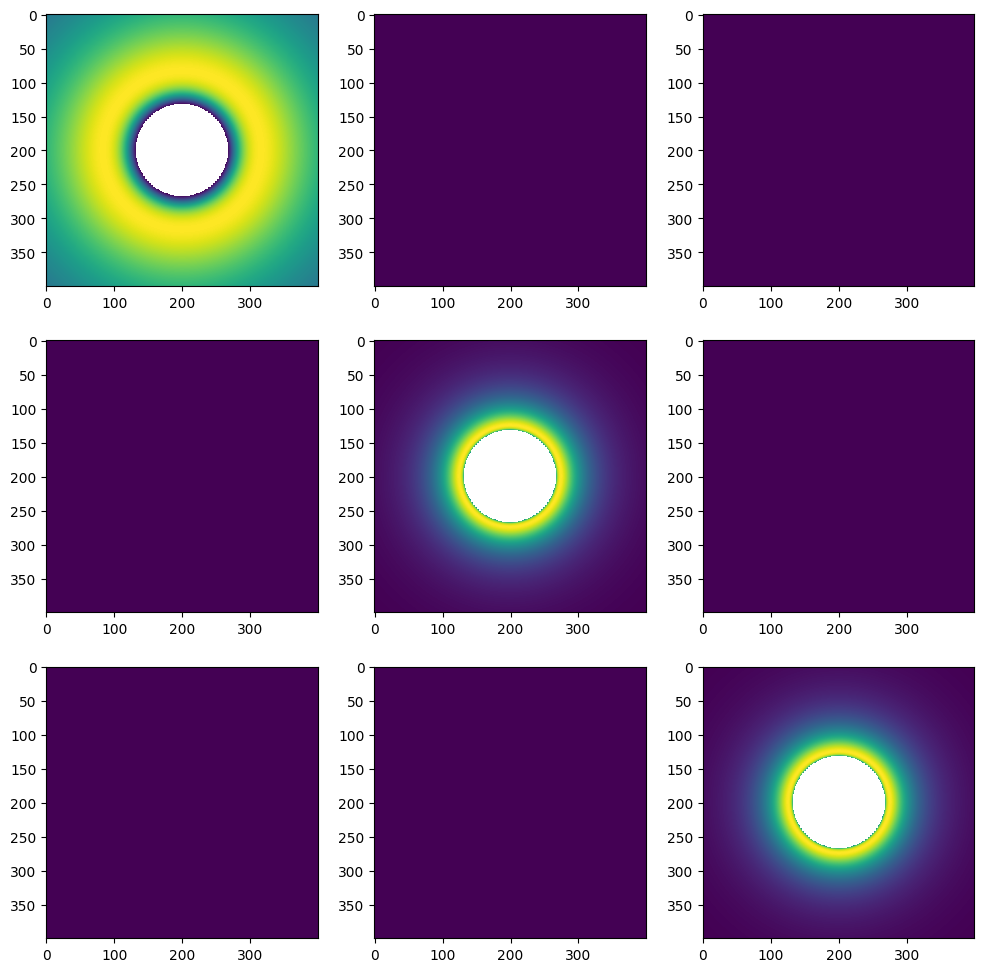

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.imshow(E_comps[i])

In [42]:
vector1 = sm.Matrix([[r_cart], [theta_cart], [phi_cart]])
vector2 = sm.Matrix([[x],[y],[z]])

J = vector1.jacobian(vector2)
J

[x/sqrt(x**2 + y**2 + z**2), y/sqrt(x**2 + y**2 + z**2), z/sqrt(x**2 + y**2 + z**2)]
[x*z/((x**2 + y**2 + z**2)**(3/2)*sqrt(1 - z**2/(x**2 + y**2 + z**2))), y*z/((x**2 + y**2 + z**2)**(3/2)*sqrt(1 - z**2/(x**2 + y**2 + z**2))), -(-z**2/(x**2 + y**2 + z**2)**(3/2) + (x**2 + y**2 + z**2)**(-1/2))/sqrt(1 - z**2/(x**2 + y**2 + z**2))]
[-y/(x**2 + y**2), x/(x**2 + y**2), 0]

In [43]:
gij_sph

[1 - (x**2 + y**2 + z**2)**(-1/2), 0, 0]
[0, (x**2 + y**2 + z**2)**(-1), 0]
[0, 0, 1/((x**2 + y**2 + z**2)*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2)]

In [44]:
# gij_cart = (J.inv())*gij_sph*(J.inv()).transpose()
gij_cart = (J.transpose())*gij_sph*(J)

In [45]:
det_gij_cart_sqrt = sm.sqrt(gij_cart.det())

In [46]:
E_cart = det_gij_cart_sqrt * gij_cart

In [47]:
E_num_cart = E_cart.subs(x, sp.symbols('(xg)'))
E_num_cart = E_num_cart.subs(y, sp.symbols('(yg)'))
E_num_cart = E_num_cart.subs(z, sp.symbols('(zg)'))

In [48]:
E_comps_cart = []

for i in range(3):
    for j in range(3):
        elem = eval(str(E_num_cart[i,j]))
        if type(elem)==int:
                  elem = np.zeros((400,400))
        E_comps_cart.append(elem)
        print('done comp: [{},{}]'.format(i,j))

<string>:1: RuntimeWarning: invalid value encountered in sqrt


done comp: [0,0]
done comp: [0,1]
done comp: [0,2]
done comp: [1,0]
done comp: [1,1]
done comp: [1,2]
done comp: [2,0]
done comp: [2,1]
done comp: [2,2]


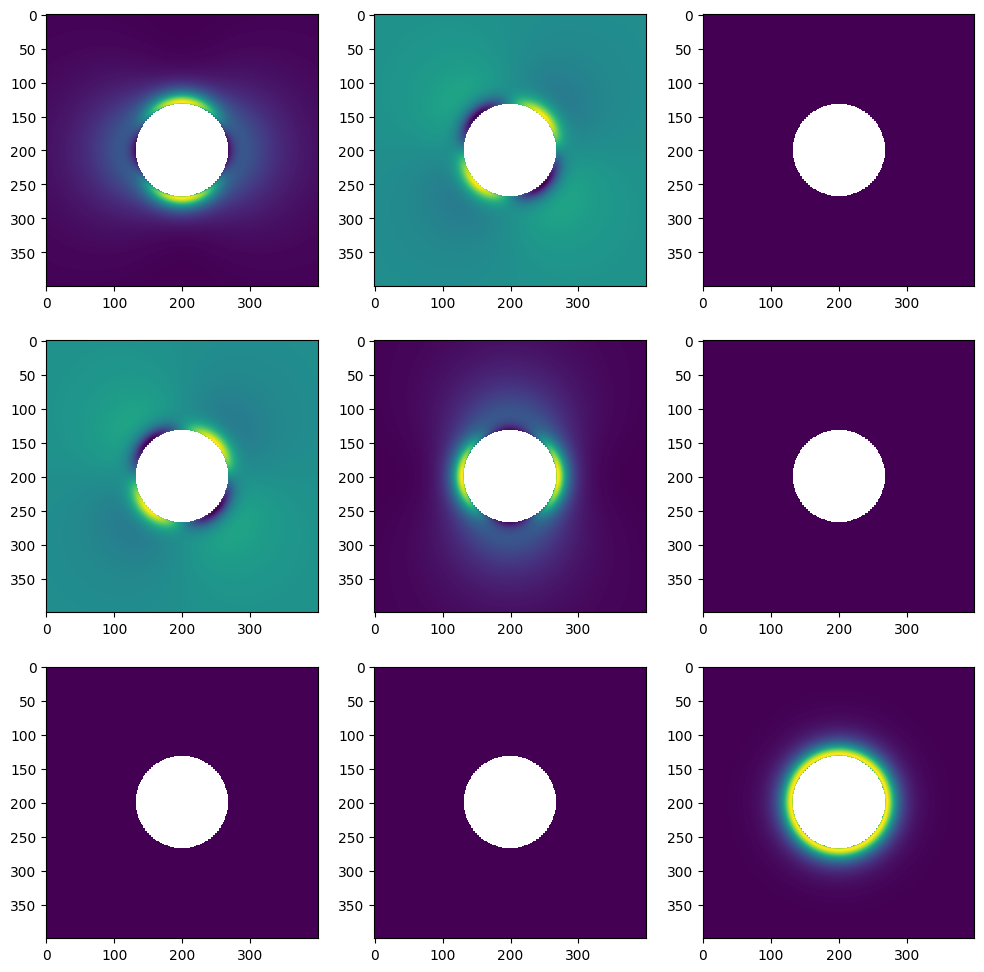

In [49]:
fig = plt.figure(figsize=(12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.imshow(E_comps_cart[i])

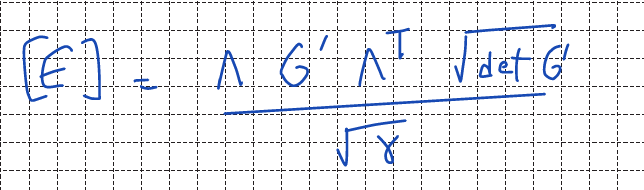

In [50]:
g_ij_sph_xyz = g_ij_sph.subs(r,r_cart)
g_ij_sph_xyz = g_ij_sph_xyz.subs(theta,theta_cart)
g_ij_sph_xyz = g_ij_sph_xyz.subs(phi,phi_cart)

In [51]:
g_sph = sm.Matrix([[1,0,0],[0,sm.Pow(r,2),0],[0,0,sm.Pow(r,2)*sm.sin(theta)**2]])
g_sph

[1, 0, 0]
[0, r**2, 0]
[0, 0, r**2*sin(theta)**2]

In [52]:
gamma_sqrt = sm.sqrt(g_sph.det())
gamma_sqrt

sqrt(r**4*sin(theta)**2)

In [53]:
J

[x/sqrt(x**2 + y**2 + z**2), y/sqrt(x**2 + y**2 + z**2), z/sqrt(x**2 + y**2 + z**2)]
[x*z/((x**2 + y**2 + z**2)**(3/2)*sqrt(1 - z**2/(x**2 + y**2 + z**2))), y*z/((x**2 + y**2 + z**2)**(3/2)*sqrt(1 - z**2/(x**2 + y**2 + z**2))), -(-z**2/(x**2 + y**2 + z**2)**(3/2) + (x**2 + y**2 + z**2)**(-1/2))/sqrt(1 - z**2/(x**2 + y**2 + z**2))]
[-y/(x**2 + y**2), x/(x**2 + y**2), 0]

In [54]:
det_g_ij_sph_xyz_sqrt = sm.sqrt(g_ij_sph_xyz.det())

In [55]:
E_new = J*g_ij_sph_xyz*J.transpose()*det_g_ij_sph_xyz_sqrt/gamma_sqrt

In [56]:
gij_cart

[x**2*(1 - (x**2 + y**2 + z**2)**(-1/2))/(x**2 + y**2 + z**2) + x**2*z**2/((x**2 + y**2 + z**2)**4*(1 - z**2/(x**2 + y**2 + z**2))) + y**2/((x**2 + y**2)**2*(x**2 + y**2 + z**2)*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2), x*y*(1 - (x**2 + y**2 + z**2)**(-1/2))/(x**2 + y**2 + z**2) + x*y*z**2/((x**2 + y**2 + z**2)**4*(1 - z**2/(x**2 + y**2 + z**2))) - x*y/((x**2 + y**2)**2*(x**2 + y**2 + z**2)*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2), x*z*(1 - (x**2 + y**2 + z**2)**(-1/2))/(x**2 + y**2 + z**2) - x*z*(-z**2/(x**2 + y**2 + z**2)**(3/2) + (x**2 + y**2 + z**2)**(-1/2))/((x**2 + y**2 + z**2)**(5/2)*(1 - z**2/(x**2 + y**2 + z**2)))]
[x*y*(1 - (x**2 + y**2 + z**2)**(-1/2))/(x**2 + y**2 + z**2) + x*y*z**2/((x**2 + y**2 + z**2)**4*(1 - z**2/(x**2 + y**2 + z**2))) - x*y/((x**2 + y**2)**2*(x**2 + y**2 + z**2)*sin(acos(z/sqrt(x**2 + y**2 + z**2)))**2), y**2*(1 - (x**2 + y**2 + z**2)**(-1/2))/(x**2 + y**2 + z**2) + y**2*z**2/((x**2 + y**2 + z**2)**4*(1 - z**2/(x**2 + y**2 + z**2))) + x**2/((x**2 + y

In [57]:
E_num_new = E_new.subs(r, r_cart)
E_num_new = E_new.subs(theta, theta_cart)
E_num_new = E_new.subs(phi, phi_cart)
E_num_new = E_num_new.subs(x, sp.symbols('(xg)'))
E_num_new = E_num_new.subs(y, sp.symbols('(yg)'))
E_num_new = E_num_new.subs(z, sp.symbols('(zg)'))

In [58]:
eval(str(E_num_new[0,0]))

<string>:1: RuntimeWarning: invalid value encountered in sqrt


TypeError: loop of ufunc does not support argument 0 of type symengine.lib.symengine_wrapper.Symbol which has no callable sin method

In [ ]:
E_comps_new = []

for i in range(3):
    for j in range(3):
        elem = eval(str(E_num_new[i,j]))
        if type(elem)==int:
                  elem = np.zeros((400,400))
        E_comps_new.append(elem)
        print('done comp: [{},{}]'.format(i,j))

<string>:1: RuntimeWarning: invalid value encountered in sqrt


TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable sqrt method